In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
""""
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
"""

In [28]:
heart=pd.read_csv("C:\heart.csv")
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
heart.head()   #  returns a specified number of rows, string from the top. 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
heart.rename(columns={'output':'target'},inplace=True) # It can be used to change the names of variables in a data frame

In [31]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
shape=heart.ndim    # The ndim() function is a NumPy function that returns the number of dimensions of an array.
shape

2

In [33]:
print("shape of the dataset:",heart.shape)   # Return the shape of an array.


shape of the dataset: (303, 14)


In [34]:
heart.info() # It prints a concise summary of the DataFrame's structure and information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [35]:
heart.isnull().sum()  # The IS NULL operator is used to test for empty values (NULL values).

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

<Axes: >

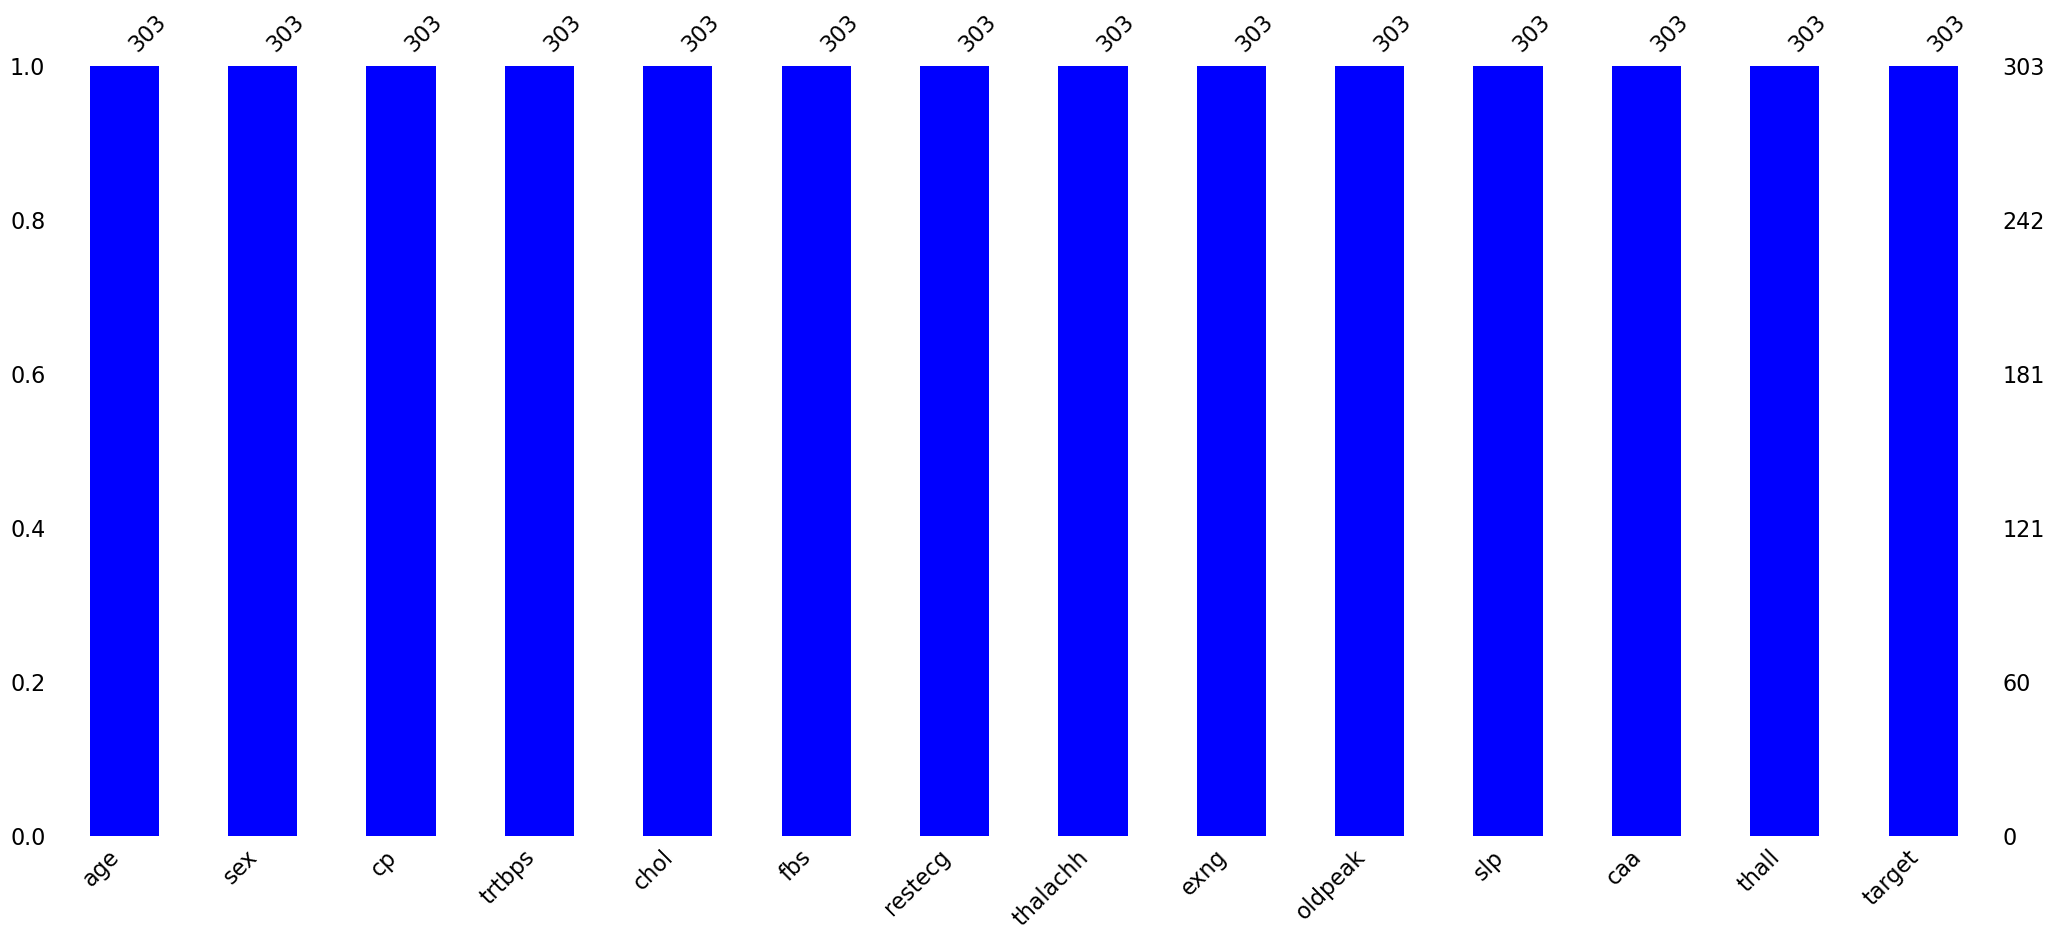

In [36]:
import missingno as msno 
msno.bar(heart,color="b")


In [37]:
unique_number=[]    #  # Initializing an empty list to store the counts of unique values

for i in heart.columns:
    x=heart[i].value_counts().count()   #  # Initializing an empty list to store the counts of unique values

    unique_number.append(x)    # Appending the count to the list
    
pd.DataFrame(unique_number, index=heart.columns, columns=["Total Unique Values"])


,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [38]:
numeric_value=["age","trtbps","chol","thalachh","oldpeak"]
categoric_value=["sex","cp","fbs","restecg","exng","slp","caa","thall","target"]

In [39]:
heart[numeric_value].describe()   #method provides descriptive statistics of the numeric columns in the DataFrame, including count, mean, standard deviation, minimum, and quartiles.
 

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [40]:
heart[categoric_value].describe()

,sex,cp,fbs,restecg,exng,slp,caa,thall,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,0.148515,0.528053,0.326733,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,0.356198,0.525860,0.469794,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [41]:
heart.corr()   #  method is used to calculate the correlation between numerical columns in a DataFrame.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

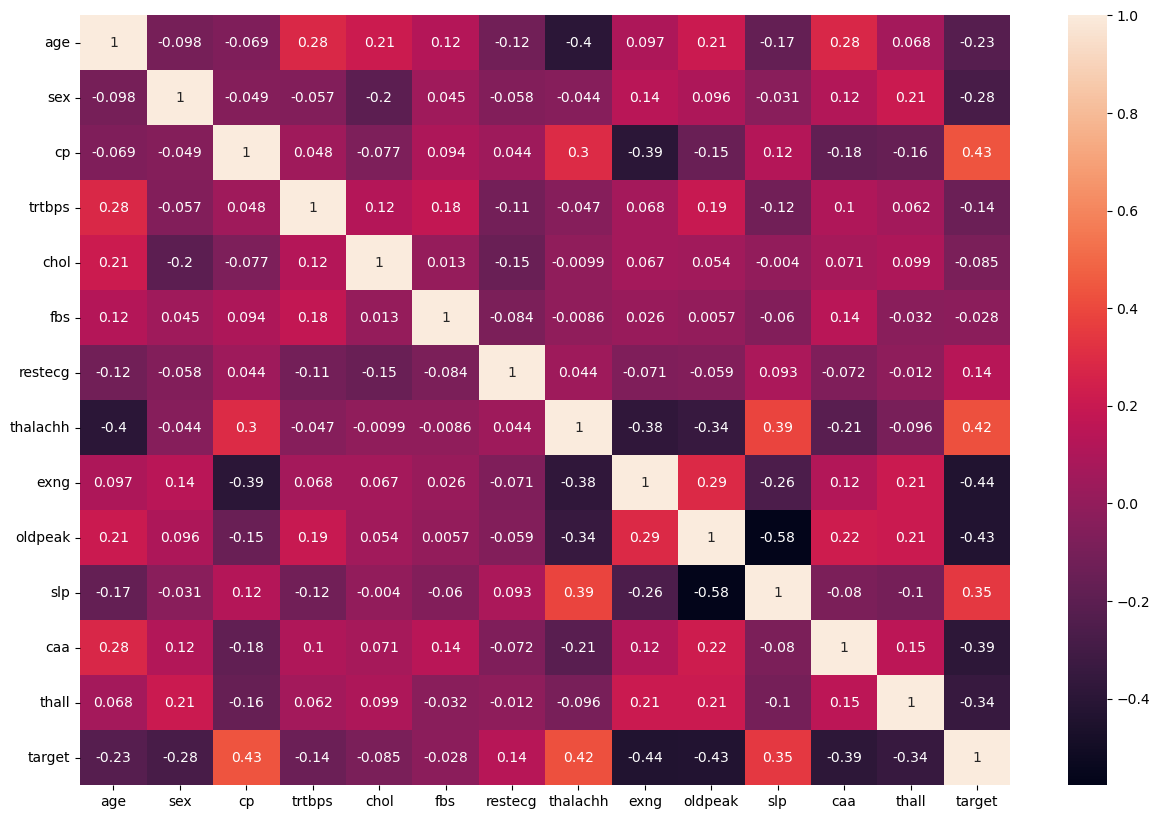

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(),annot=True)

# logistic Regression 

In [43]:
X=heart.drop(columns="target",axis=1)
Y=heart["target"]

In [44]:
print(X)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

In [45]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [47]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


In [48]:
logistic_model=LogisticRegression()
logistic_model

LogisticRegression()

In [49]:
logistic_model.fit(X_train,Y_train)

C:\Users\Rohan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
prediction=logistic_model.predict(X_test)
prediction

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [53]:
accuracy=accuracy_score(Y_test,prediction)
accuracy


0.8524590163934426

In [59]:
from sklearn.metrics import confusion_matrix

Testing Accuracy for Logistic Regression: 0.8524590163934426
Testing Sensitivity for Logistic Regression: 0.8461538461538461
Testing Specificity for Logistic Regression: 0.8571428571428571
Testing Precision for Logistic Regression: 0.8148148148148148


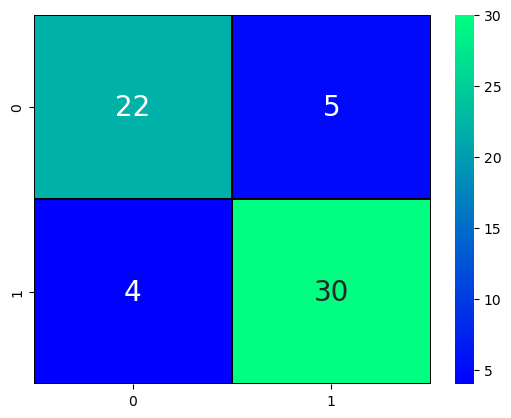

In [55]:
cm=confusion_matrix(Y_test,prediction)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
"""
annot=True parameter displays the values in each cell, 
and cmap='winter' sets the color map to 'winter'. 
The linewidths and linecolor parameters control the width and color of the lines between cells,
annot_kws={"size": 20} adjusts the font size of the annotations.
"""

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [56]:
cm

array([[22,  5],
       [ 4, 30]], dtype=int64)

In [57]:
report=classification_report(Y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Descision Tree 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.97      0.97      0.97        34

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

Testing Accuracy for Decision Tree: 0.9672131147540983
Testing Sensitivity for Decision Tree: 0.9629629629629629
Testing Specificity for Decision Tree: 0.9705882352941176
Testing Precision for Decision Tree: 0.9629629629629629


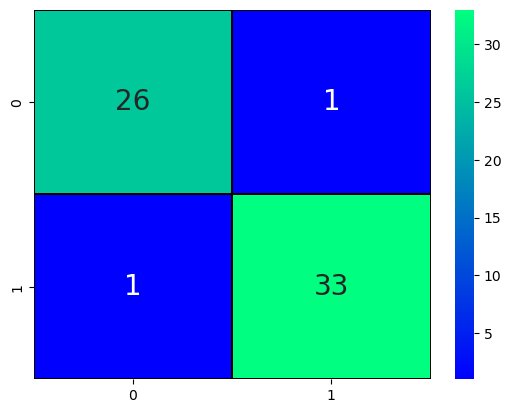

In [58]:
tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')

m=tree_model.fit(X, Y)
prediction=m.predict(X_test)
cm= confusion_matrix(Y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(Y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

[Text(0.5056818181818182, 0.9166666666666666, 'x[2] <= 0.5\nentropy = 0.994\nsamples = 303\nvalue = [138, 165]'),
 Text(0.2784090909090909, 0.75, 'x[11] <= 0.5\nentropy = 0.845\nsamples = 143\nvalue = [104, 39]'),
 Text(0.17045454545454544, 0.5833333333333334, 'x[12] <= 2.5\nentropy = 0.998\nsamples = 65\nvalue = [31, 34]'),
 Text(0.09090909090909091, 0.4166666666666667, 'x[8] <= 0.5\nentropy = 0.79\nsamples = 38\nvalue = [9, 29]'),
 Text(0.045454545454545456, 0.25, 'x[7] <= 96.5\nentropy = 0.414\nsamples = 24\nvalue = [2, 22]'),
 Text(0.022727272727272728, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06818181818181818, 0.08333333333333333, 'entropy = 0.258\nsamples = 23\nvalue = [1, 22]'),
 Text(0.13636363636363635, 0.25, 'x[6] <= 0.5\nentropy = 1.0\nsamples = 14\nvalue = [7, 7]'),
 Text(0.11363636363636363, 0.08333333333333333, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.1590909090909091, 0.08333333333333333, 'entropy = 0.881\nsamples = 10\nv

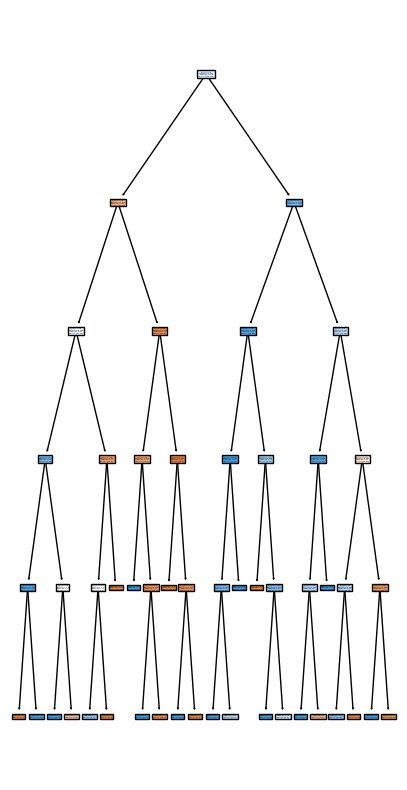

In [61]:
from sklearn import tree
plt.figure(figsize=(5,10))
tree.plot_tree(tree_model,filled=True)


# RANDOM FOREST

85.25
Testing Accuracy for Random Forest: 0.8524590163934426
Testing Sensitivity for Random Forest: 0.8461538461538461
Testing Specificity for Random Forest: 0.8571428571428571
Testing Precision for Random Forest: 0.8148148148148148


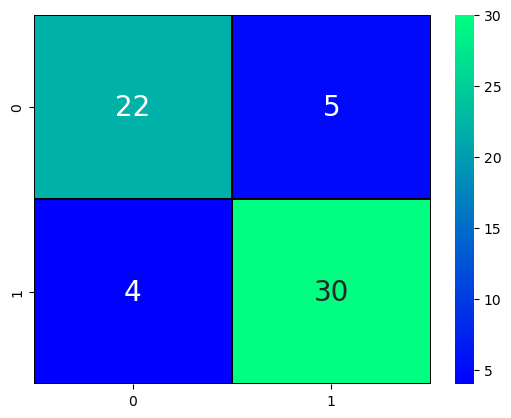

In [60]:
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, Y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(Y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,Y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))